# Cat and Dog Classification using SVM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
from skimage.io import imread
from skimage.transform import resize

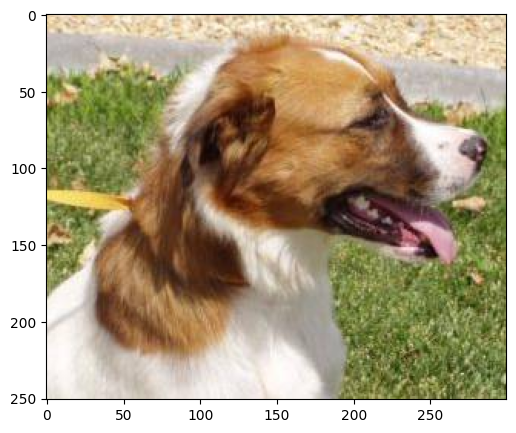

In [2]:
plt.figure(figsize=(10,5))
img1 = r"C:\test_set\dogs\dog.4040.jpg"
plt.imshow(imread(img1))

In [3]:
img_path = r"C:\test_set\dogs\dog.4040.jpg"
img = imread(img_path)
img

array([[[195, 171, 135],
        [218, 194, 158],
        [239, 216, 182],
        ...,
        [237, 223, 186],
        [233, 219, 180],
        [231, 217, 178]],

       [[236, 212, 176],
        [235, 211, 175],
        [228, 206, 169],
        ...,
        [247, 233, 196],
        [242, 227, 188],
        [237, 223, 184]],

       [[221, 197, 159],
        [230, 206, 168],
        [242, 218, 180],
        ...,
        [235, 219, 183],
        [239, 221, 185],
        [238, 222, 186]],

       ...,

       [[231, 227, 218],
        [235, 231, 222],
        [228, 224, 215],
        ...,
        [138, 149,  89],
        [126, 140,  79],
        [119, 133,  72]],

       [[231, 227, 218],
        [235, 231, 222],
        [228, 224, 215],
        ...,
        [164, 175, 115],
        [147, 161, 100],
        [132, 146,  84]],

       [[231, 227, 216],
        [235, 231, 220],
        [228, 224, 213],
        ...,
        [146, 160,  98],
        [131, 145,  83],
        [113, 128,  63]]

In [4]:
img.shape

(251, 300, 3)

In [5]:
img_resize = resize(img, (15,15))
img_resize.shape

(15, 15, 3)

In [6]:
img_resize

array([[[0.86131877, 0.79500353, 0.70035055],
        [0.87855356, 0.81409636, 0.72071935],
        [0.89161923, 0.82875518, 0.72012505],
        [0.89413195, 0.82489106, 0.71155898],
        [0.90119241, 0.83353839, 0.72331803],
        [0.89009941, 0.81470547, 0.70124795],
        [0.88135231, 0.7916939 , 0.66698686],
        [0.86938862, 0.76336713, 0.61398111],
        [0.9040748 , 0.814189  , 0.67648243],
        [0.90778113, 0.83774632, 0.71920297],
        [0.90855035, 0.83663225, 0.71274669],
        [0.89814264, 0.82295778, 0.69123976],
        [0.89426588, 0.81771449, 0.68556265],
        [0.90527909, 0.82008548, 0.68184852],
        [0.90542119, 0.82486319, 0.6902513 ]],

       [[0.74604361, 0.7252458 , 0.68878694],
        [0.76564562, 0.73240399, 0.67178158],
        [0.77264328, 0.7365537 , 0.64482411],
        [0.7730794 , 0.7357977 , 0.67230095],
        [0.7851943 , 0.75201482, 0.69368718],
        [0.82318709, 0.75688478, 0.68893393],
        [0.77361417, 0.59856613,

In [7]:
flatten_img = img_resize.flatten()
flatten_img

array([0.86131877, 0.79500353, 0.70035055, 0.87855356, 0.81409636,
       0.72071935, 0.89161923, 0.82875518, 0.72012505, 0.89413195,
       0.82489106, 0.71155898, 0.90119241, 0.83353839, 0.72331803,
       0.89009941, 0.81470547, 0.70124795, 0.88135231, 0.7916939 ,
       0.66698686, 0.86938862, 0.76336713, 0.61398111, 0.9040748 ,
       0.814189  , 0.67648243, 0.90778113, 0.83774632, 0.71920297,
       0.90855035, 0.83663225, 0.71274669, 0.89814264, 0.82295778,
       0.69123976, 0.89426588, 0.81771449, 0.68556265, 0.90527909,
       0.82008548, 0.68184852, 0.90542119, 0.82486319, 0.6902513 ,
       0.74604361, 0.7252458 , 0.68878694, 0.76564562, 0.73240399,
       0.67178158, 0.77264328, 0.7365537 , 0.64482411, 0.7730794 ,
       0.7357977 , 0.67230095, 0.7851943 , 0.75201482, 0.69368718,
       0.82318709, 0.75688478, 0.68893393, 0.77361417, 0.59856613,
       0.44136264, 0.78268027, 0.57196421, 0.35134718, 0.84215121,
       0.67027909, 0.4747803 , 0.87755933, 0.76151553, 0.61730

In [8]:
flatten_img.shape

(675,)

In [9]:
input_dir = r"C:\test_set"
categories = ['cats', 'dogs']
data = []
labels = []
for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir, category)):
        img_path = os.path.join(input_dir, category, file)
        print(img_path)
        img = imread(img_path)
        img = resize(img, (15,15))
        data.append(img.flatten())
        labels.append(category_idx)    

C:\test_set\cats\cat.4001.jpg
C:\test_set\cats\cat.4002.jpg
C:\test_set\cats\cat.4003.jpg
C:\test_set\cats\cat.4004.jpg
C:\test_set\cats\cat.4005.jpg
C:\test_set\cats\cat.4006.jpg
C:\test_set\cats\cat.4007.jpg
C:\test_set\cats\cat.4008.jpg
C:\test_set\cats\cat.4009.jpg
C:\test_set\cats\cat.4010.jpg
C:\test_set\cats\cat.4011.jpg
C:\test_set\cats\cat.4012.jpg
C:\test_set\cats\cat.4013.jpg
C:\test_set\cats\cat.4014.jpg
C:\test_set\cats\cat.4015.jpg
C:\test_set\cats\cat.4016.jpg
C:\test_set\cats\cat.4017.jpg
C:\test_set\cats\cat.4018.jpg
C:\test_set\cats\cat.4019.jpg
C:\test_set\cats\cat.4020.jpg
C:\test_set\cats\cat.4021.jpg
C:\test_set\cats\cat.4022.jpg
C:\test_set\cats\cat.4023.jpg
C:\test_set\cats\cat.4024.jpg
C:\test_set\cats\cat.4025.jpg
C:\test_set\cats\cat.4026.jpg
C:\test_set\cats\cat.4027.jpg
C:\test_set\cats\cat.4028.jpg
C:\test_set\cats\cat.4029.jpg
C:\test_set\cats\cat.4030.jpg
C:\test_set\cats\cat.4031.jpg
C:\test_set\cats\cat.4032.jpg
C:\test_set\cats\cat.4033.jpg
C:\test_se

In [10]:
data[1]

array([0.49455332, 0.47327465, 0.41579835, 0.45960165, 0.43884834,
       0.38972562, 0.41084784, 0.39092072, 0.34617174, 0.3628795 ,
       0.34705993, 0.29736049, 0.33822314, 0.32095534, 0.26825516,
       0.31766447, 0.29872341, 0.2486088 , 0.34199951, 0.30726556,
       0.23351812, 0.32740655, 0.29093812, 0.21316026, 0.36551905,
       0.30683014, 0.19713855, 0.39916555, 0.31345704, 0.20236217,
       0.28833835, 0.17949345, 0.1104213 , 0.25334435, 0.11283439,
       0.06173506, 0.31074502, 0.12356083, 0.06305852, 0.38028219,
       0.14828401, 0.06444084, 0.43458703, 0.17870038, 0.07178485,
       0.45322278, 0.4360103 , 0.39156084, 0.3172875 , 0.29101513,
       0.24941391, 0.33613407, 0.30697625, 0.26116193, 0.33128587,
       0.28081434, 0.22738559, 0.30031112, 0.22825628, 0.1657873 ,
       0.29802613, 0.22460842, 0.16432392, 0.31045938, 0.2362979 ,
       0.1713315 , 0.31252053, 0.24393091, 0.17853141, 0.32775265,
       0.2300237 , 0.15846611, 0.35289422, 0.1910449 , 0.10535

In [11]:
labels[1]

0

In [12]:
data = np.asarray(data)
labels = np.asarray(labels)

In [13]:
data

array([[0.46717939, 0.58898388, 0.64124616, ..., 0.51179056, 0.57388877,
        0.6087126 ],
       [0.49455332, 0.47327465, 0.41579835, ..., 0.40116611, 0.17388368,
        0.07268538],
       [0.19569579, 0.17964409, 0.14638953, ..., 0.57304762, 0.50764377,
        0.48233354],
       ...,
       [0.47520526, 0.40143693, 0.33460227, ..., 0.50796179, 0.45401545,
        0.39586824],
       [0.54860723, 0.54893046, 0.54503866, ..., 0.59786659, 0.62639173,
        0.60671373],
       [0.95148604, 0.95150613, 0.94981646, ..., 0.10356239, 0.10356728,
        0.09573501]], shape=(2023, 675))

In [14]:
labels

array([0, 0, 0, ..., 1, 1, 1], shape=(2023,))

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

# Built SVM Model for classification

In [17]:
from sklearn.svm import SVC
svm_model = SVC()

### Model Training

In [18]:
svm_model.fit(x_train, y_train)

SVC()

In [19]:
y_pred = svm_model.predict(x_test)
y_pred

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,

In [20]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.6246913580246913

In [21]:
from sklearn.model_selection import cross_val_score
cross_val_score = cross_val_score(svm_model, data, labels, cv = 5)
cross_val_score

array([0.58518519, 0.60987654, 0.64444444, 0.66336634, 0.64356436])

In [22]:
Mean_Accuracy = cross_val_score.mean()
Mean_Accuracy

np.float64(0.6292873731817626)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.61      0.62       202
           1       0.62      0.64      0.63       203

    accuracy                           0.62       405
   macro avg       0.62      0.62      0.62       405
weighted avg       0.62      0.62      0.62       405



In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
classifer = SVC()
parameters = [{'gamma':[0.01, 0.001, 0.0001], 'C':[10, 100, 1000]}]
grid_search = GridSearchCV(classifer, parameters)
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}])

In [26]:
best_estimator = grid_search.best_estimator_
best_estimator

SVC(C=10, gamma=0.01)

In [27]:
y_prediction = best_estimator.predict(x_test)
y_prediction

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,

# Classify the Image

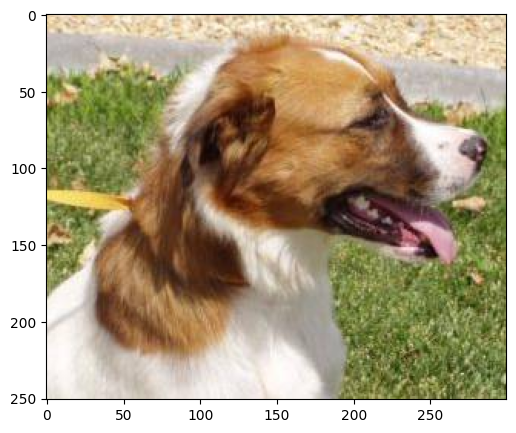

In [28]:
plt.figure(figsize=(10, 5))
img_path = r"C:\test_set\dogs\dog.4040.jpg"
plt.imshow(imread(img1))

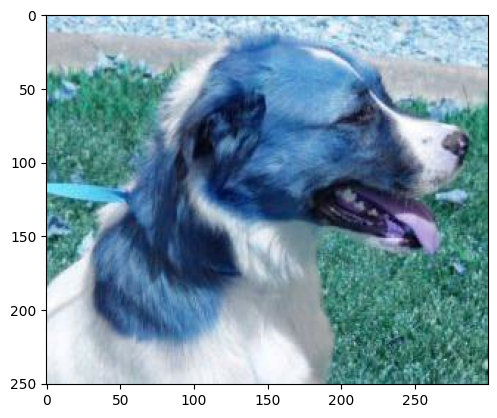

In [29]:
import cv2 as cv
img_path = cv.imread(img1)
plt.imshow(img_path)

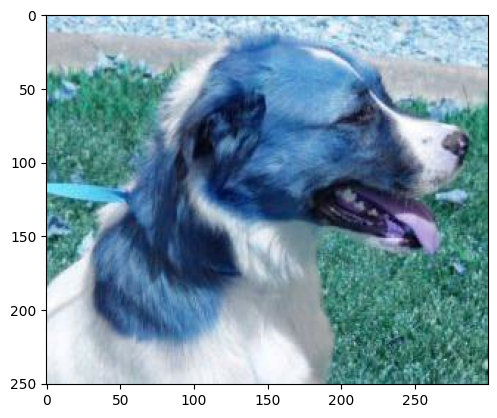

In [30]:
img_dog = r"C:\test_set\dogs\dog.4040.jpg"
img_path = cv.imread(img_dog)
plt.imshow(img_path)

In [31]:
img_dog = r"C:\test_set\dogs\dog.4040.jpg"
img_new = imread(img_dog)
img_new1 = resize(img_new, (15,15))
img_flatten = img_new1.flatten()
img_array = np.asarray(img_flatten)

result = svm_model.predict(img_array.reshape(1, -1))

if result[0] == 1:
    print("Result =", result[0])
    print("It is a cat.")
else:
    print("It is a dog.")

Result = 1
It is a cat.


In [35]:
def image_classification_prediction(image):
    img_new = imread(image)
    img_new1 = resize(img_new, (15,15))
    img_flatten = img_new1.flatten()
    img_array = np.asarray(img_flatten)
    result = svm_model.predict(img_array.reshape(1, -1))
    img_path = cv.imread(image)
    plt.imshow(img_path)
    if result[0] == 1:
        print("Result =", result[0])
        return "It is a cat"
    else:
        return "IT is a dog"
        

'IT is a dog'

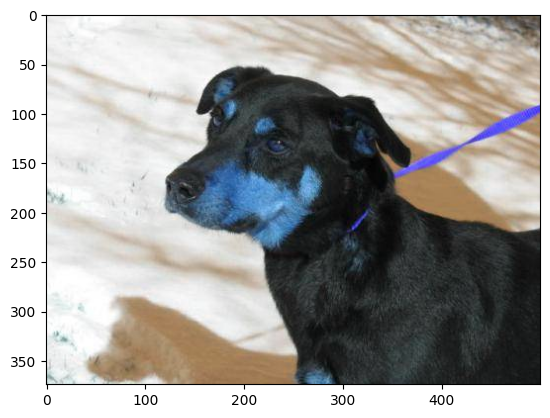

In [36]:
img2 = r"C:\test_set\dogs\dog.5000.jpg"
image_classification_prediction(img2)

'IT is a dog'

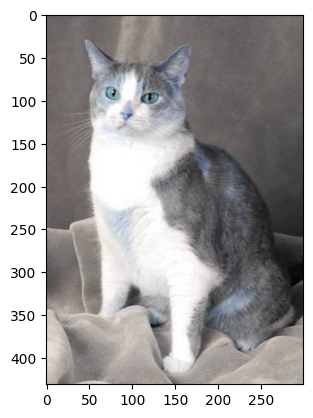

In [37]:
img3 = r"C:\test_set\cats\cat.4041.jpg"
image_classification_prediction(img3)